# install library

In [ ]:
# google colab üzerinde çalıştığım için verileri her seferinde verileri colab'a yüklememek için drive'ıma yükledim. 
# Burada drive google colab'a bağlanır.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### We may need to restart the runtime for the library we have updated library to generate graphs.

In [ ]:
import pandas as pd # veriyi excelden almak ve veriyle önişlemler gerçekleşitrmek için kütüphane
!pip install gensim==4.1.2
import gensim # lda'nın olduğu kütüphane
from gensim.utils import simple_preprocess # veriyi lda modelinde kullanmak için önişleme modülü
import gensim.corpora as corpora # veriyi lda modelinde kullanmak için sözlük modülü
import numpy as np # matematiksel işlemler için kütüphane
!pip install wordcloud==1.8.1
from wordcloud import WordCloud # veride geçen en çok kelimeleri görselleştirmek için kelime bulutu kütüphanesi
from collections import Counter # veride geçen kelimeleri saydırmak için kütüphane
!pip install matplotlib
!pip3 install matplotlib --upgrade
import matplotlib.pyplot as plt # grafik oluşturmak için kütüphane
from gensim.models.coherencemodel import CoherenceModel # modeli değerlendirmek için modül
import nltk # türkçe stopwords'leri kullanmak için

from nltk.tokenize import RegexpTokenizer # Cümleleri makine için daha anlaşılır yapmak için bölmek için modül
!pip install pyLDAvis==3.3.1 # LDA'nın kümelediği kümeleri görselleştirme kütüphanesi
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=4cf077d1a38ec927aeec8af7234c2121d5f4d2ee6e7cf19baa01d9f9690db049
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDA

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


# data

In [ ]:
# veriler farklı excel'ler üzerinde olduğu için pandas üzerinden okunur ve birleştirilir.

df1 = pd.read_excel('/content/drive/MyDrive/CallToTexNewData.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/CallToTexNewData1.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/CallToTexNewData2.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/CallToTexNewData3.xlsx')
df = df1.append([df2,df3,df4], ignore_index=True)

# sadece müşteri çağrıları ve ürünlerle çalışağımızdan aşağıdaki veriler verisetinden çıkarılır.
df.drop(columns=['CallId','Kuyruk','AgentText'], inplace=True)

df

,CustomerText,Kuyruk Konusu
0,*d *d alo,Uzaktan Erişim
1,*d *d *d iyi günler nereden arıyorsunuz evet b...,Memnuniyet Araması
2,iyi günler ben bu kampanyaya *****ılırım başar...,Öncelikli Müşteri Televizyon
3,*d *d alo günaydın merhaba buyurun benim benim...,Uzaktan Erişim
4,iyi günler günaydın şey ben bugün gün kaldım d...,Öncelikli Müşteri Beyaz Eşya
...,...,...
19995,eee merhaba iyi günler dilerim elimde * tablet...,Öncelikli Müşteri Telefon
19996,kolay gelsin opera * ***** vardı da ***** tele...,Televizyon
19997,*d *d yani alo buyurun dinliyorum evet aldım ü...,Memnuniyet Araması
19998,açayım isim neydi barış bey merhaba bizim * ta...,Satış


In [ ]:
df['Kuyruk Konusu'].nunique() # kaç tane konu var?

17

In [ ]:
df['Kuyruk Konusu'].value_counts() # konu isimleri ve sayıları

Telefon                         4091
Beyaz Eşya                      2937
Televizyon                      2379
Çözüm Ekibi                     2315
Uzaktan Erişim                  1885
Memnuniyet Araması              1883
Öncelikli Müşteri Telefon       1515
Öncelikli Müşteri Beyaz Eşya    1075
Öncelikli Müşteri Televizyon     851
Satış                            503
Kurulum                          478
İngilizce Çağrılar                62
Kurumsal Satış - Telefon          12
Önceliklik Müşteri Telefon         7
Kurumsal Satış                     5
Hizmet Takibi Servis Takibi        1
Yeni Ürün Tanıtımı                 1
Name: Kuyruk Konusu, dtype: int64

In [ ]:
df.isna().sum()

CustomerText     0
Kuyruk Konusu    0
dtype: int64

<AxesSubplot:>

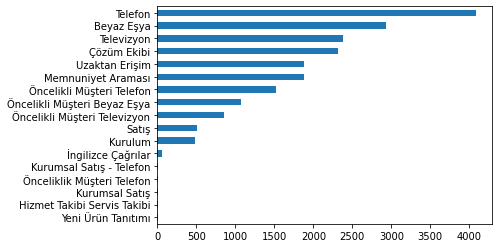

In [ ]:
df['Kuyruk Konusu'].value_counts().sort_values().plot(kind = 'barh')

In [ ]:
df.sample(5)

,CustomerText,Kuyruk Konusu
4708,nilgün ver benim şu anda kullandığım telef*um ...,Telefon
10434,pard* erkan mi dediğiniz hah erkan bey merhaba...,Satış
8275,alo kolay gelsin ***** marka * marka * mikro d...,Beyaz Eşya
8121,*d *d bu ürün ***** * saniye *az bu sefer de e...,Çözüm Ekibi
15818,iyi günler bizim ***** ııı wifi'yi uyumlu * te...,Televizyon


In [ ]:
df

,CustomerText,Kuyruk Konusu
0,*d *d alo,Uzaktan Erişim
1,*d *d *d iyi günler nereden arıyorsunuz evet b...,Memnuniyet Araması
2,iyi günler ben bu kampanyaya *****ılırım başar...,Öncelikli Müşteri Televizyon
3,*d *d alo günaydın merhaba buyurun benim benim...,Uzaktan Erişim
4,iyi günler günaydın şey ben bugün gün kaldım d...,Öncelikli Müşteri Beyaz Eşya
...,...,...
19995,eee merhaba iyi günler dilerim elimde * tablet...,Öncelikli Müşteri Telefon
19996,kolay gelsin opera * ***** vardı da ***** tele...,Televizyon
19997,*d *d yani alo buyurun dinliyorum evet aldım ü...,Memnuniyet Araması
19998,açayım isim neydi barış bey merhaba bizim * ta...,Satış


In [ ]:
df[df['CustomerText'].apply(len)<10].sample(5)

,CustomerText,Kuyruk Konusu
18396,*d diyor,Uzaktan Erişim
9845,* * *,Öncelikli Müşteri Telefon
10656,*d o,Memnuniyet Araması
15929,*d *d alo,Telefon
745,emel hı,Televizyon


In [ ]:
df['numberwords'] = df.CustomerText.apply(lambda x: len(x.split()))

5267

In [ ]:
df

,CustomerText,Kuyruk Konusu,numberwords
0,*d *d alo,Uzaktan Erişim,3
1,*d *d *d iyi günler nereden arıyorsunuz evet b...,Memnuniyet Araması,14
2,iyi günler ben bu kampanyaya *****ılırım başar...,Öncelikli Müşteri Televizyon,193
3,*d *d alo günaydın merhaba buyurun benim benim...,Uzaktan Erişim,55
4,iyi günler günaydın şey ben bugün gün kaldım d...,Öncelikli Müşteri Beyaz Eşya,29
...,...,...,...
19995,eee merhaba iyi günler dilerim elimde * tablet...,Öncelikli Müşteri Telefon,82
19996,kolay gelsin opera * ***** vardı da ***** tele...,Televizyon,105
19997,*d *d yani alo buyurun dinliyorum evet aldım ü...,Memnuniyet Araması,16
19998,açayım isim neydi barış bey merhaba bizim * ta...,Satış,39


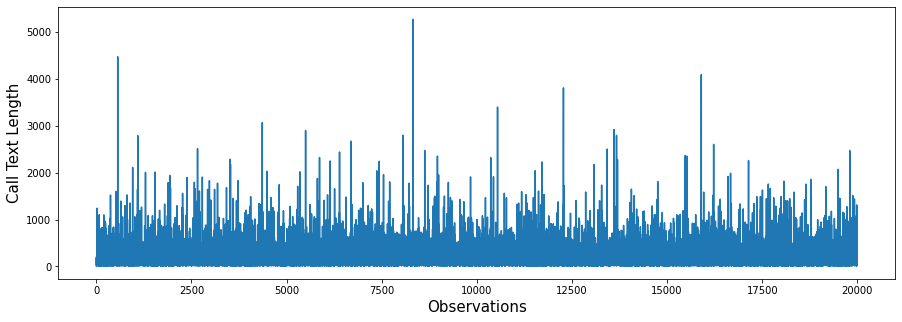

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df['numberwords'])
plt.xlabel("Observations", fontsize=15)
plt.ylabel("Call Text Length", fontsize=15);

In [ ]:
from collections import Counter
yirmikelime = Counter(" ".join(df["CustomerText"]).split()).most_common(20)
yirmikelime

[('*', 276917),
 ('evet', 96869),
 ('tamam', 89883),
 ('ben', 81196),
 ('yani', 69965),
 ('yok', 55035),
 ('bu', 54021),
 ('şey', 53804),
 ('de', 48707),
 ('ııı', 44921),
 ('o', 42662),
 ('ya', 40896),
 ('*****', 39554),
 ('da', 38912),
 ('şimdi', 37154),
 ('var', 35021),
 ('ama', 32836),
 ('mi', 29805),
 ('iyi', 28773),
 ('değil', 28732)]

In [ ]:
yirmidf=pd.DataFrame({
    'kelime' : ['*', 'evet','tamam','ben','yani','yok','bu','şey','de','ııı','o','ya','*****','da','şimdi','var','ama','mi','iyi','değil'],
    'sayı' : [276917,96869,89883,81196,69965,55035,54021,53804,48707,44921,42662,40896,39554,38912,37154,35021,32836,29805,28773,28732]
    })

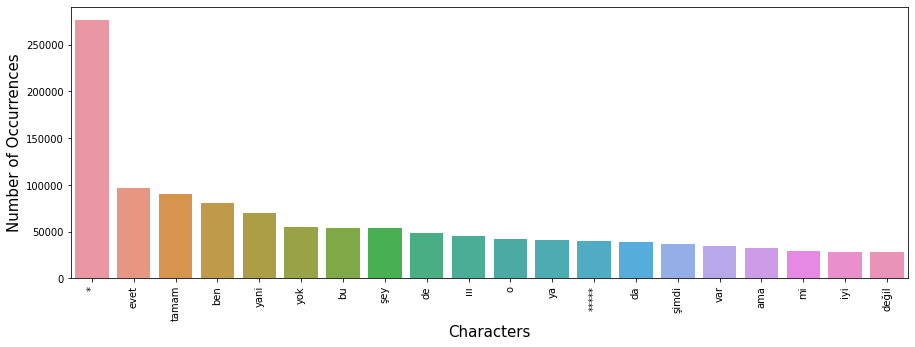

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=yirmidf.kelime, y=yirmidf.sayı, ax=ax)
ax.set_ylabel('Number of Occurrences', fontsize=15)
ax.set_xlabel('Characters', fontsize=15)
ax.xaxis.set_tick_params(rotation=90)

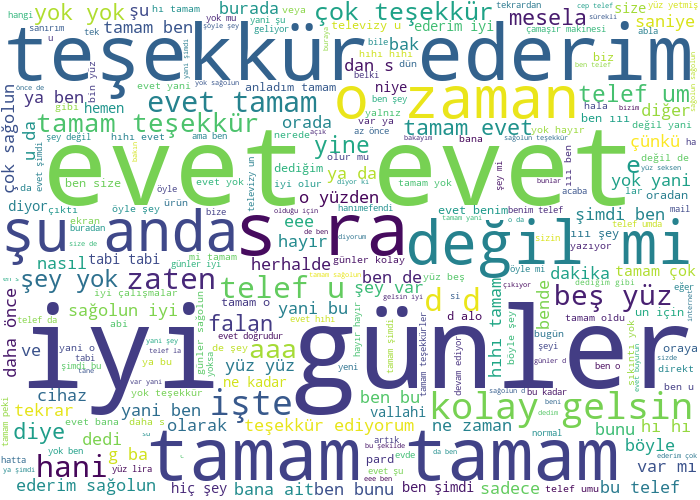

In [ ]:
# verilerde geçen en çok 250 kelime (kelime bulutu)
long_string = ','.join(list(df['CustomerText'].values))
wordcloud = WordCloud(background_color="white", max_words=250, width=700, height=500, contour_width=10, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
# algoritmanın bazı konulardaki farklılıkları anlayamadığı düşünülerek konular birleştirilmiştir.
# öncelikli müşteri telefon ile telefon arasındaki farkı anlamayacağı düşünülerek birleştirilmiştir.

df['Kuyruk Konusu'] = df['Kuyruk Konusu'].str.replace('Öncelikli Müşteri Telefon', 'Telefon')
df['Kuyruk Konusu'] = df['Kuyruk Konusu'].str.replace('Öncelikli Müşteri Beyaz Eşya', 'Beyaz Eşya')
df['Kuyruk Konusu'] = df['Kuyruk Konusu'].str.replace('Öncelikli Müşteri Televizyon', 'Televizyon')
df['Kuyruk Konusu'] = df['Kuyruk Konusu'].str.replace('Kurumsal Satış - Telefon', 'Telefon')
df['Kuyruk Konusu'] = df['Kuyruk Konusu'].str.replace('Önceliklik Müşteri Telefon', 'Telefon')
df['Kuyruk Konusu'] = df['Kuyruk Konusu'].str.replace('Kurumsal Satış', 'Satış')

df['Kuyruk Konusu'].value_counts()

Telefon                        5625
Beyaz Eşya                     4012
Televizyon                     3230
Çözüm Ekibi                    2315
Uzaktan Erişim                 1885
Memnuniyet Araması             1883
Satış                           508
Kurulum                         478
İngilizce Çağrılar               62
Hizmet Takibi Servis Takibi       1
Yeni Ürün Tanıtımı                1
Name: Kuyruk Konusu, dtype: int64

<AxesSubplot:>

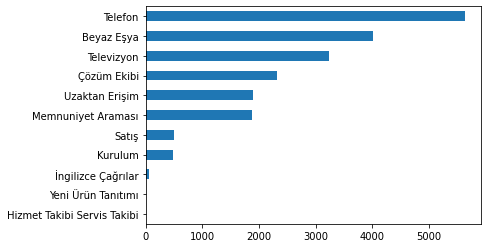

In [ ]:
df['Kuyruk Konusu'].value_counts().sort_values().plot(kind = 'barh')

In [ ]:
# 3 konunun çok az verisi olduğundan dolayı modelde kullanılmaz, çıkarılır.
df.drop(df[df['Kuyruk Konusu'] == 'Yeni Ürün Tanıtımı'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'Hizmet Takibi Servis Takibi'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'İngilizce Çağrılar'].index, inplace = True)
df

,CustomerText,Kuyruk Konusu
0,*d *d alo,Uzaktan Erişim
1,*d *d *d iyi günler nereden arıyorsunuz evet b...,Memnuniyet Araması
2,iyi günler ben bu kampanyaya *****ılırım başar...,Televizyon
3,*d *d alo günaydın merhaba buyurun benim benim...,Uzaktan Erişim
4,iyi günler günaydın şey ben bugün gün kaldım d...,Beyaz Eşya
...,...,...
19995,eee merhaba iyi günler dilerim elimde * tablet...,Telefon
19996,kolay gelsin opera * ***** vardı da ***** tele...,Televizyon
19997,*d *d yani alo buyurun dinliyorum evet aldım ü...,Memnuniyet Araması
19998,açayım isim neydi barış bey merhaba bizim * ta...,Satış


<AxesSubplot:>

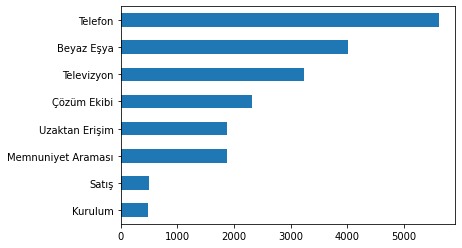

In [ ]:
df['Kuyruk Konusu'].value_counts().sort_values().plot(kind = 'barh')

In [ ]:
df['Kuyruk Konusu'].value_counts() # konular ve sayıları

Telefon               5625
Beyaz Eşya            4012
Televizyon            3230
Çözüm Ekibi           2315
Uzaktan Erişim        1885
Memnuniyet Araması    1883
Satış                  508
Kurulum                478
Name: Kuyruk Konusu, dtype: int64

In [ ]:
# 3 konunun çok az verisi olduğundan dolayı modelde kullanılmaz, çıkarılır.
df.drop(df[df['Kuyruk Konusu'] == 'Kurulum'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'Memnuniyet Araması'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'Satış'].index, inplace = True)

df

,CustomerText,Kuyruk Konusu
0,*d *d alo,Uzaktan Erişim
2,iyi günler ben bu kampanyaya *****ılırım başar...,Televizyon
3,*d *d alo günaydın merhaba buyurun benim benim...,Uzaktan Erişim
4,iyi günler günaydın şey ben bugün gün kaldım d...,Beyaz Eşya
5,iyi günler efendim ııı cuma günü de yok herhal...,Beyaz Eşya
...,...,...
19993,*d *d *d *d teşekkürler alo alo şimdi şimdi ha...,Uzaktan Erişim
19994,şimdi mesela geldi iyi günler efendim iyi çalı...,Telefon
19995,eee merhaba iyi günler dilerim elimde * tablet...,Telefon
19996,kolay gelsin opera * ***** vardı da ***** tele...,Televizyon


<AxesSubplot:>

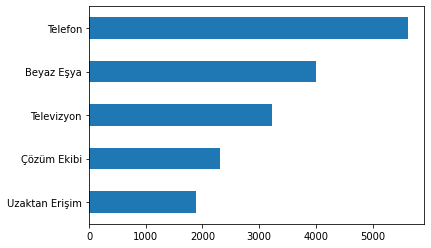

In [ ]:
df['Kuyruk Konusu'].value_counts().sort_values().plot(kind = 'barh')

In [ ]:
df['Kuyruk Konusu'].value_counts() # konular ve sayıları

Telefon           5625
Beyaz Eşya        4012
Televizyon        3230
Çözüm Ekibi       2315
Uzaktan Erişim    1885
Name: Kuyruk Konusu, dtype: int64

# preprocess data

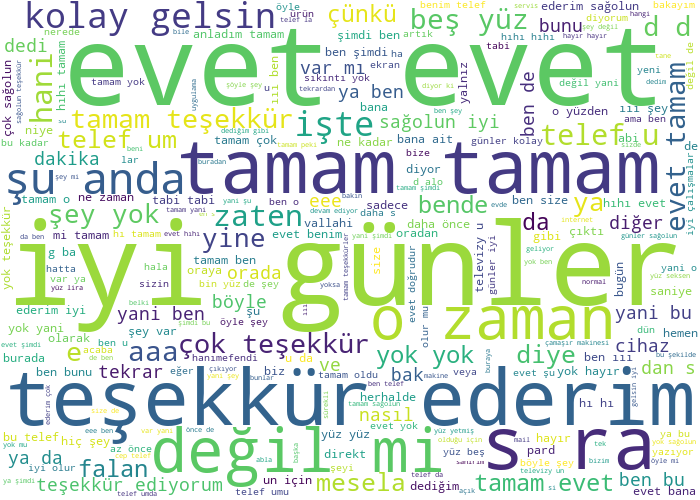

In [ ]:
# verilerde geçen en çok 250 kelime (kelime bulutu)
long_string = ','.join(list(df['CustomerText'].values))
wordcloud = WordCloud(background_color="white", max_words=250, width=700, height=500, contour_width=10, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
# doğal dil işlemede normalde ek çıkarmak için stemmer ve lemmmatizer kullanılır fakat bizim verimizde bunlar uygulandığında bazı kelimeler kesilip anlamsızlaşmıştır. 
# bu yüzden verilerin manuel olarak ekleri silinmiştir ve bazı kelimeler düzeltilmiştir. örnek: m*taj > montaj
df['CustomerText'] = df['CustomerText'].str.replace(r'birim[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'birim', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'tablet[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'tablet', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'telefon[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'telefon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'televizyon[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'televizyon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'makine[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'makine', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'şifre[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'şifre', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ekran[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'ekran', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'garanti[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'garanti', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ar\u0131za[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'arıza', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r's\u00fcp\u00fcrge[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'süpürge', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'siz[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'siz', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'do\u011fru[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'doğru', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'gel[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'gel', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'gir[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'gir', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'tamam[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'tamam', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'biz[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'biz', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ben[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'ben', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ses[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'ses', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ayar[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'ayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'uygulama[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'uygulama', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'numara[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'numara', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'bey[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bey', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'bilgisayar[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'buzdola[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'buzdolap', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ankast[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'ankastre', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'davlumbaz[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'davlumbaz', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'f\u0131r\u0131n[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'fırın', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'mikrodalga[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'mikro dalga', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'mikrodalga', 'mikro dalga', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'mikro dalga[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'mikro dalga', regex=True)

df['CustomerText'] = df['CustomerText'].str.replace(r'set \u00fcst\u00fc[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'set üstü', regex=True)

df['CustomerText'] = df['CustomerText'].str.replace(r'bozu[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'arıza', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'buz dola[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'buzdolap', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'buluray[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bluray', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'eniks[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'nx', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'enx[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'nx', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'enix[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'nx', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'klima[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'klima', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'diz\u00fcst\u00fc[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'diz \u00fcst\u00fc[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'laptop[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'notebook[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'faks[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'faks', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'yaz\u0131c\u0131[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'yazıcı', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'taray\u0131c\u0131[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'tarayıcı', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\u00e7amas\u0131r[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'çamaşır', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'kurutma[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'kurutma', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'makina[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'makine', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'telekom[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'telekom', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\u015fikayet[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'şikayet', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'cihaz[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'cihaz', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\bara[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'arama', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'internet[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'internet', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'mesaj[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'mesaj', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btel\b', 'telefon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btelef\b', 'telefon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'mobil[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'mobil', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btel\b', 'telefon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'bula\u015f\u0131k[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bulaşık', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'sistem[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'sistem', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\bpc\b', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ses sistem', 'ev sinema sistem', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'sinema sistem', 'ev sinema sistem', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\bkayd', 'kayıt', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btv\'[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'tv', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btv\b', 'televizyon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btelevizy\b', 'televizyon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btrol\b', 'kontrol', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'batarya[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'batarya', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'm\*taj', 'montaj', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'montaj[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'montaj', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'm\*it\u00f6r', 'monitör', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'monit\u00f6r[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'monitör', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\u015farj[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'şarj', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'servis[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'servis', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\bkod', 'kod', regex=True)


df

,CustomerText,Kuyruk Konusu
0,*d *d alo,Uzaktan Erişim
2,iyi günler ben bu kampanyaya *****ılırım başar...,Televizyon
3,*d *d alo günaydın merhaba buyurun ben ben buy...,Uzaktan Erişim
4,iyi günler günaydın şey ben bugün gün kaldım d...,Beyaz Eşya
5,iyi günler efendim ııı cuma günü de yok herhal...,Beyaz Eşya
...,...,...
19993,*d *d *d *d teşekkürler alo alo şimdi şimdi ha...,Uzaktan Erişim
19994,şimdi mesela gel iyi günler efendim iyi çalışm...,Telefon
19995,eee merhaba iyi günler dilerim elimde * tablet...,Telefon
19996,kolay gel opera * ***** vardı da ***** televiz...,Televizyon


In [ ]:
# doğal dil işleme için ön işleme

tokenizer = RegexpTokenizer(r'\w+') # Cümleleri küçük ifadelere böler değişkeni tanımlanır.
punct_re=lambda x :" ".join(tokenizer.tokenize(x.lower())) # Verileri küçük harflere dönüştür değişkeni tanımlanır.

nltk.download('stopwords') # nltk'den stopwords indirilir. Veri ne kadar sade olsa o kadar iyidir bundan dolayı cümleye anlam katmayan gereksiz kelimelerden(stopword) kurtulmak istenir.
stop_word_list = nltk.corpus.stopwords.words('turkish')  # Türkçe stopword'leri bir değişkene atanır

# stopword'leri çıkarmak için fonksiyon
def stopword_extraction(values):
    wordFilter = [word for word in values.split() if word not in stop_word_list]
    notStopword = " ".join(wordFilter)
    return notStopword

df["CustomerText"] = df["CustomerText"].apply(punct_re) # metin verileri küçük harflere çevir
df['CustomerText'] = df['CustomerText'].apply(lambda x: stopword_extraction(x)) # metin verilerinden stopword'leri çıkar

df['CustomerText'] = df['CustomerText'].str.replace(r'\S*@\S*\s?', '', regex=True) # e-posta sil
df['CustomerText'] = df['CustomerText'].str.replace(r'[^\w\s]', '', regex=True) # noktalama işaretlerini sil
df['CustomerText'] = df['CustomerText'].str.replace(r'http\S+', '', regex=True) # bağlantı sil
df['CustomerText'] = df['CustomerText'].str.replace(r'www\S+', '', regex=True) # bağlantı sil

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,CustomerText,Kuyruk Konusu
0,d d alo,Uzaktan Erişim
2,iyi günler ben kampanyaya ılırım başarıyla s u...,Televizyon
3,d d alo günaydın merhaba buyurun ben ben buyur...,Uzaktan Erişim
4,iyi günler günaydın ben bugün gün kaldım zaman...,Beyaz Eşya
5,iyi günler efendim ııı cuma günü yok herhalde ...,Beyaz Eşya
...,...,...
19993,d d d d teşekkürler alo alo şimdi şimdi hayır ...,Uzaktan Erişim
19994,şimdi mesela gel iyi günler efendim iyi çalışm...,Telefon
19995,eee merhaba iyi günler dilerim elimde tablet v...,Telefon
19996,kolay gel opera vardı televizyon silindi bugün...,Televizyon


In [ ]:
# modelin anlamsız sonuçlar doğurmasını engellemek için herhangi bir kelimeye bağlı olmayan kısa harf/hece/kelime çıkarılır.
remove_words =['ha','haa', 'ben', 'mi','yok', 'var', 'an', 'hı', 'alo','dan','ç','f','d', 'gün', 'onu','ben','mı', 'mi','anda','size','oldu','olur','r',
               'he', 'la', 'den','olab','bak','hah','ba','hım','gir','gel','siz','biz','ilg','tl','baska','evet', 'ııı','eee','tamam','simdi', 'falan', 'zaten', 'mesela', 'aaa', 'herhalde','tabi', 'yine',
                'kolay', 'gelsin', 'teşekkür', 'ederim', 'dakika', 'bir', 'saniye', 'günler', 'iyi', 'akşamlar',
                'vallahi', 'hani', 'işte', 'efendim', 'canım', 'peki', 'abi', 'hıhı', 'sağolun','hehe', 'buyurun','hanım',
                'benim','zaman', 'bey', 'söyle', 'diyor', 'değil', 'bana', 'sizi', 'sonra', 'bunu','anladım','hayır',
                'teşekkürler', 'böyle', 'öyle','bilmiyorum', 'burada','bunun','dediğim', 'aynen','tekrar','günaydın',
                'önce', 'şeyi','dedi','bende', 'sadece','diğer','orada','sağolasın','rica','ulaştı','valla', 'bugün',
                'bağlayab','misiniz', 'hanımefendi', 'abicim', 'kızım', 'hocam', 'abla', 'ablacığım', 'inşallah', 'hayırlı','hayırlı işler',
                'beyefendi', 'şekilde', 'kardeşim', 'dediler', 'ismim', 'hemen', 'diyorum','bakın','bes yüz','e','merhaba','pard','un','bin yüz',
                'pardon','doğru', 'merhabalar','gerçekten', 'şey', 'çünkü','s','ra','nasıl', 'u','hoşçakalın','müsait','çok', 'um','umu',
               'trol edelim','miyim','murat','ahmet','şöyle','olabilir','eğer','fatih','hakan','ayse','elif','gökhan','deniz',
               'can', 'bes','öz_gi','tan','yüz','bin','yetmiş','seksen','doksan','atmış','tane','uda','nasılsınız','için','heh','aa','si','sanırım','artık',
               'sağol','ay','olarak', 'almıştım','aldık','aldım','hee','no','on','sen','hiç','şeyler','bunlar','söyleyeyim','dedim',
               'şimdi','arama','musunuz','başka','beş','model','kod','ait','dün','yarın','numara','değ','allah','umun','tire','cihaz']

sil = r'\b(?:{})\b'.format('|'.join(remove_words)) # kelimeleri silmek için sil değişkeni
df['CustomerText'] = df['CustomerText'].str.replace(sil, '', regex=True) # kelimeler silinir.
df.drop(df[df['CustomerText'].map(len) < 10].index, inplace=True) # metin verilerinde 10'dan az karaktere sahipleri sil (hiçbir şey anlatmadığı için)

# index düzelt
df.reset_index(inplace=True)
df.set_index('index')
df.drop(columns=['index'], inplace=True)

df

,CustomerText,Kuyruk Konusu
0,kampanyaya ılırım başarıyla uçlandırmak te...,Televizyon
1,h l gece uğraştım hallettim ilginize ...,Uzaktan Erişim
2,kaldım saat derecede evde sırf...,Beyaz Eşya
3,cuma günü üstte gürbüz lira abimiz arıza...,Beyaz Eşya
4,müsaitim smarta pencerede gör...,Uzaktan Erişim
...,...,...
16953,dinliyorum vardı yüzden ...,Uzaktan Erişim
16954,çalışmalar diliyorum zamandı time işl...,Telefon
16955,dilerim elimde tablet galaxy tab mart mar...,Telefon
16956,opera vardı televizyon silindi çalışıyordu...,Televizyon


<AxesSubplot:>

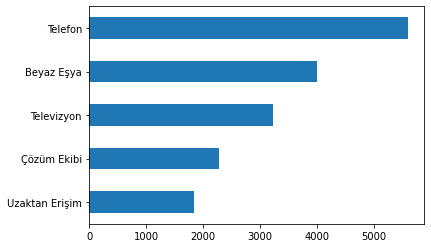

In [ ]:
df['Kuyruk Konusu'].value_counts().sort_values().plot(kind = 'barh')

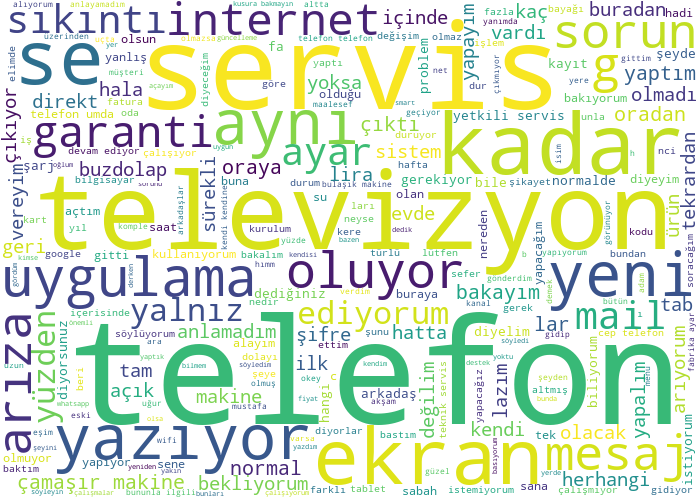

In [ ]:
# kelime bulutu en çok 250 kelime
long_string = ','.join(list(df['CustomerText'].values))
wordcloud = WordCloud(background_color="white", max_words=250, width=700, height=500, contour_width=10, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()


In [ ]:
# lda algoritması için gerekli girdiler oluşturulur.
# cümleleri kelimeler listesine dönüştür.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

df_article_list = df.CustomerText.tolist()
data_words = list(sent_to_words(df_article_list))

print(data_words[:1])

[['kampanyaya', 'ılırım', 'basarıyla', 'uclandırmak', 'televizyon', 'ogrenmek', 'basvuru', 'versem', 'bakabilir', 'miyiz', 'para', 'kart', 'kampanyası', 'mart', 'olumsuz', 'cevap', 'aldıgım', 'bayiiye', 'doldurup', 'gondermis', 'mart', 'urunu', 'martta', 'mart', 'yanlıs', 'hatırlamıyorsam', 'doldurup', 'gondermistim', 'zeynel', 'edersem', 'esimin', 'uzerine', 'yasin', 'basarılı', 'olmus', 'oncesinde', 'anlayamadım', 'kanal', 'tarihleri', 'uygun', 'tarihleri', 'almamıstınız', 'vesaire', 'yanlıs', 'hatırlamıyorsam', 'mesaj', 'sıkıntı', 'yoktur', 'mesaj', 'tekrardan', 'kartı', 'yuk', 'karta', 'para', 'ediyorum', 'diyoruz', 'ilce', 'mart', 'nisanda', 'insanlar', 'mesaj', 'uzerine', 'zamanında', 'yaptı', 'soyledigimizde', 'bayi', 'doldurup', 'gonderdigini', 'soyledi', 'bilemiyorum', 'demek', 'sıkıntı', 'ediyorum', 'duyuyorum', 'saglıklı']]


In [ ]:
# lda algoritması için gerekli girdiler oluşturulur.
# bigram, en çok kullanılan yöntemdir. Bu yöntem metni ikişer olarak parçalamaya yarar.

bigram = gensim.models.Phrases(data_words, min_count=10, threshold=20) 
# min_count= Toplam toplanan sayısı bu değerden düşük olan tüm sözcükleri ve bigramları yoksayın.
# threshold = ifadeleri oluşturmak için bir eşiği temsil eder(daha yüksek, daha az kelime öbeği anlamına gelir).
bigram_mod = gensim.models.phrases.Phraser(bigram)

# söz öbekleri oluştur
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

data_words_bigrams = make_bigrams(data_words)

In [ ]:
# lda algoritması için gerekli girdiler oluşturulur.

# id->word haritalaması yüklenir 
id2word = corpora.Dictionary(data_words_bigrams) # bag of words için metin külliyatı ve sözlük yapma

# metin külliyatı
texts = data_words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]


#model

In [ ]:
# model tanımı

import time
from pprint import pprint

# lda modeli tanımı
def make_model(num_topics):

  t_start = time.time()

  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=1000, passes = 20,
                                              alpha=2, eta=0.01, random_state=42) 
# alfa, belge-konu yoğunluğunu temsil eder - daha yüksek bir alfa ile belgeler daha fazla konudan oluşur ve daha düşük alfa ile belgeler daha az konu içerir. 
# eta, konu-kelime yoğunluğunu temsil eder - yüksek bir eta ile konular bütüncedeki kelimelerin çoğundan oluşur ve düşük bir eta ile birkaç kelimeden oluşur.
# dokümanın 14 konudan oluştuğunu bildiğimiz için yüksek konu sayısına göre sonuç elde edebilmek için alfa yüksek, eta düşük tutulur.

  print("Geçen süre: "+str(time.time()-t_start)+" saniye")
  
  pprint("********** HER KONUDAN EN ÇOK 10 KELİME *************")
  pprint(lda_model.print_topics(num_topics=-1, num_words=10))

  return lda_model

#model results

In [ ]:
lda_model = make_model(5) # şimdilik 5 konu aranır. daha sonra optimum konu sayısı bulunacak.

Geçen süre: 136.6118984222412 saniye
'********** HER KONUDAN EN ÇOK 10 KELİME *************'
[(0,
  '0.077*"telefon" + 0.013*"mesaj" + 0.008*"sarj" + 0.008*"mail" + '
  '0.006*"sorun" + 0.006*"yeni" + 0.005*"sıkıntı" + 0.005*"kullanıyorum" + '
  '0.004*"oluyor" + 0.004*"telefon_umda"'),
 (1,
  '0.018*"makine" + 0.014*"servis" + 0.011*"buzdolap" + 0.010*"arıza" + '
  '0.010*"camasır_makine" + 0.006*"icinde" + 0.006*"su" + 0.005*"yıl" + '
  '0.005*"fatura" + 0.005*"garanti"'),
 (2,
  '0.022*"ayar" + 0.016*"uygulama" + 0.014*"internet" + 0.013*"televizyon" + '
  '0.012*"yazıyor" + 0.007*"cıktı" + 0.007*"ekran" + 0.007*"ses" + '
  '0.006*"yaptım" + 0.006*"acık"'),
 (3,
  '0.019*"servis" + 0.009*"kadar" + 0.006*"aynı" + 0.006*"arıza" + '
  '0.006*"lira" + 0.005*"urun" + 0.005*"sikayet" + 0.004*"geri" + '
  '0.003*"degisim" + 0.003*"istemiyorum"'),
 (4,
  '0.031*"televizyon" + 0.018*"ekran" + 0.015*"servis" + 0.014*"garanti" + '
  '0.010*"ses" + 0.007*"ediyorum" + 0.006*"oluyor" + 0.006*"var


0. telefon
1. beyaz eşya
2. televizyon
3. çözüm ekibi
4. uzaktan


In [ ]:
# konuların(kümelerin) görsel gösterimi

pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


#model evaluation

## C_v (for 5 topics)

In [ ]:
# tutarlılığı ölçmek (0 ile 1 arası skor / skorun 1'e yakın olması daha iyidir.)
# C_v: Normalleştirilmiş noktasal karşılıklı bilgi (NPMI) ve kosinüs benzerliğini kullanan dolaylı bir doğrulama ölçüsüne dayanır.
# Kayan pencere algoritmasına dayanır. En iyi kelimelerin tek kümeli segmentasyonu, her en iyi kelime vektörü ile tüm en iyi kelime vektörlerinin toplamı arasındaki benzerliğin hesaplanmasını sağlar.
# Benzerlik ölçüsü olarak kosinüs kullanılır. Tutarlılık, bu benzerliklerin aritmetik ortalamasıdır.

from gensim.models.coherencemodel import CoherenceModel
cv_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
print('c_v skoru: ', cv_lda.get_coherence())

c_v skoru:  0.3400576786807593


## NPMI (for 5 topics)

In [ ]:
# NPMI metriği, UCI'ın PMI yerine NPMI kullanılarak geliştirilmiş bir tutarlılık ölçüsüdür.
# 1 ile 1 arasında sürekli bir değerdir. 1'e yaklaştıkça birlikte oluşumu gösterir.
# 0'a yakınsa bağımsızlığı gösterir.
from gensim.models.coherencemodel import CoherenceModel
cnpmi_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_npmi')
print('c_npmi skoru: ', cnpmi_lda.get_coherence())

c_npmi skoru:  0.010672499215915777


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
umass_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='u_mass')
print('umass skoru: ', umass_lda.get_coherence())

umass skoru:  -1.8115973357832273


## Topic Diversity (for 5 topics)

[topic diversity metrics github](https://github.com/silviatti/topic-model-diversity)

In [ ]:
!cp /content/drive/MyDrive/diversity_metrics.py .
!cp /content/drive/MyDrive/rbo.py .
!cp /content/drive/MyDrive/word_embeddings_rbo.py .

In [ ]:
# Konu çeşitliliğini değerlendirmek için kütüphane
from diversity_metrics import *

from gensim.test.utils import datapath
from gensim.models import KeyedVectors

In [ ]:
word_list1 =['telefon','mesaj','sarj','mail','sorun','yeni','sıkıntı','kullanıyorum','oluyor','telefon']
word_list2= ['makine','servis','buzdolap','arıza','camasır makine','icinde','su','yıl','fatura','garanti']
word_list3= ['ayar','uygulama','internet','televizyon','yazıyor','cıktı','ekran','ses','yaptım','acık']
word_list4 =['servis','kadar','aynı','arıza','lira','urun','sikayet','geri','degisim','istemiyorum']
word_list5 =['televizyon','ekran','servis','garanti','ses','ediyorum','oluyor','vardı','calısmıyor','arıza']

topics = [word_list1, word_list2, word_list3, word_list4, word_list5]

In [ ]:
print("puw:",proportion_unique_words(topics, topk=10)) # Benzersiz kelimelerin oranı(puw)
print("jd:", pairwise_jaccard_diversity(topics, topk=10)) # ortalama İkili Jaccard Mesafesi(jd)
print("irbo p=0.5:",irbo(topics, weight=0.5, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,5
print("irbo p=0.9:",irbo(topics, weight=0.9, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,9

puw: 0.8
jd: 0.9369281045751634
irbo p=0.5: 0.9613594941128863
irbo p=0.9: 0.9114189090430451


## Evaluations by number of topics

In [ ]:
# konu sayısı değiştikçe skor da değişmektedir bu sebeple konu sayısının değişmesiyle skorun değişmesini gözlemlenir ve en iyi konu saysına karar verilir.
import time
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):

    start_time = time.perf_counter()
    cv_values = []
    cnpmi_values=[]
    perp_values=[]
    time_vals=[]
    model_list = []

    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=1000, passes = 20,
                                                alpha=2, eta=0.01, random_state=42)
        model_list.append(model)

        cv_model = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
        cnpmi_model = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_npmi')

        end_time = time.perf_counter()

        cv_values.append(cv_model.get_coherence())
        cnpmi_values.append(cnpmi_model.get_coherence())
        perp_values.append(model.log_perplexity(corpus))
        time_vals.append((end_time-start_time)/60)

    return model_list, cv_values, cnpmi_values, perp_values, time_vals

### Evaluation of the number of topics in the data set used for 5 topics

In [ ]:
# konu sayısı değerlendirme çalıştırılır.

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

x = range(3, 30, 3)
model_list, cv_values, cnpmi_values, perp_values, time_vals= compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_bigrams, 
                                                                                                                     start=3, limit=30, step=3)

In [ ]:
# konu sayısına göre değerlendirme sonuçları

timeee=[]
timeee.append(time_vals[0])
for i in range(0,8):
    sure=time_vals[i+1]-time_vals[i]
    timeee.append(sure)

sonuc_df = pd.DataFrame(data = {'Konu sayısı': x, 'c_v skoru(0,1)': cv_values, 'NPMI skoru(-1,1)': cnpmi_values, 'perplexity': perp_values, 'Süre(dakika)': timeee})
sonuc_df

,Konu sayısı,"c_v skoru(0,1)","NPMI skoru(-1,1)",perplexity,Süre(dakika)
0,3,0.304493,0.000361,-12.744649,2.558415
1,6,0.339775,0.014059,-12.852550,2.821470
2,9,0.353203,0.015361,-13.019297,2.880270
3,12,0.366736,0.020721,-13.157214,3.133372
4,15,0.380154,0.024926,-13.302915,3.554578
5,18,0.371353,0.025002,-13.496529,4.044610
6,21,0.357736,0.017609,-13.758768,4.395199
7,24,0.353942,0.012428,-13.948860,4.675399
8,27,0.354179,0.011398,-14.095783,5.066821


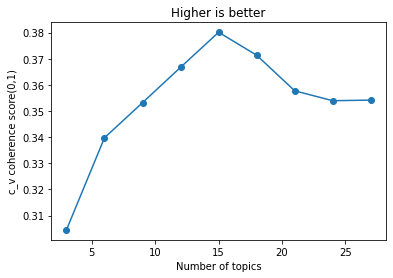

In [ ]:
# c_V
import matplotlib.pyplot as plt
%matplotlib inline

start=3; limit=30; step=3;
x = range(start, limit, step)
plt.plot(x, cv_values, 'o-')
plt.xlabel("Number of topics")
plt.ylabel("c_v coherence score(0,1)")
plt.title('Higher is better')
plt.show()

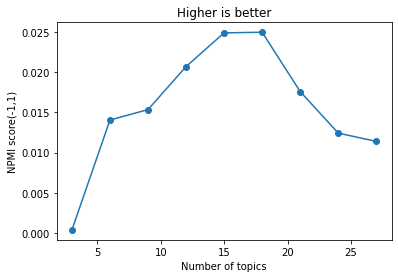

In [ ]:
# npmi

import matplotlib.pyplot as plt
%matplotlib inline

start=3; limit=30; step=3;
x = range(start, limit, step)
plt.plot(x, cnpmi_values, 'o-')
plt.xlabel("Number of topics")
plt.ylabel("NPMI score(-1,1)")
plt.title('Higher is better')
plt.show()

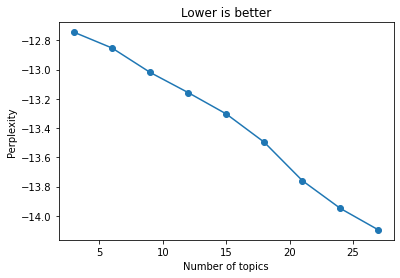

In [ ]:
# perplexity
import matplotlib.pyplot as plt
%matplotlib inline

start=3; limit=30; step=3;
x = range(start, limit, step)
plt.plot(x, perp_values, 'o-')
plt.xlabel("Number of topics")
plt.ylabel("Perplexity")
plt.title('Lower is better')
plt.show()

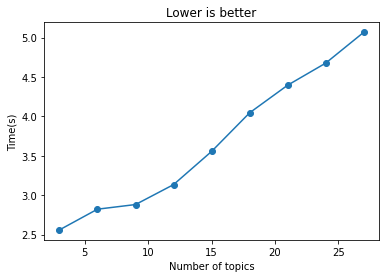

In [ ]:
# süre
import matplotlib.pyplot as plt
%matplotlib inline

start=3; limit=30; step=3;
x = range(start, limit, step)
plt.plot(x, timeee, 'o-')
plt.xlabel("Number of topics")
plt.ylabel("Time(s)")
plt.title('Lower is better')
plt.show()

In [ ]:
# lda bir dokümanın birden fazla konuya ait olduğunu düşünür fakat biz bir konuya atayacağımız için burada baskın konuyu ve katkısını buluruz.
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    sent_topics_df = pd.DataFrame()

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Her belge için Baskın konuyu, Yüzde Katkıyı ve Anahtar Kelimeleri bul
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Çıktının sonuna orijinal metni ekle
    contents = pd.Series(df.CustomerText)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Doküman No', 'Baskın Konu', 'Konunun Katkısı', 'Anahtar kelimeler', 'Yazı']
df_dominant_topic.set_index('Doküman No')
# Kaydet
df_dominant_topic.to_csv('/content/dominant_topic.csv', sep=',')
df_dominant_topic

,Doküman No,Baskın Konu,Konunun Katkısı,Anahtar kelimeler,Yazı
0,0,1.0,0.3509,"makine, servis, buzdolap, arıza, camasır_makin...",kampanyaya ılırım başarıyla uçlandırmak te...
1,1,0.0,0.3277,"telefon, mesaj, sarj, mail, sorun, yeni, sıkın...",h l gece uğraştım hallettim ilginize ...
2,2,1.0,0.2641,"makine, servis, buzdolap, arıza, camasır_makin...",kaldım saat derecede evde sırf...
3,3,1.0,0.3195,"makine, servis, buzdolap, arıza, camasır_makin...",cuma günü üstte gürbüz lira abimiz arıza...
4,4,2.0,0.4118,"ayar, uygulama, internet, televizyon, yazıyor,...",müsaitim smarta pencerede gör...
...,...,...,...,...,...
16953,16953,0.0,0.4796,"telefon, mesaj, sarj, mail, sorun, yeni, sıkın...",dinliyorum vardı yüzden ...
16954,16954,0.0,0.4584,"telefon, mesaj, sarj, mail, sorun, yeni, sıkın...",çalışmalar diliyorum zamandı time işl...
16955,16955,4.0,0.4839,"televizyon, ekran, servis, garanti, ses, ediyo...",dilerim elimde tablet galaxy tab mart mar...
16956,16956,4.0,0.4612,"televizyon, ekran, servis, garanti, ses, ediyo...",opera vardı televizyon silindi çalışıyordu...


In [ ]:
# sınıflandırma için önişlem

df_dominant_topic['Baskın Konu'] = df_dominant_topic['Baskın Konu'].astype(int)
df_dominant_topic

,Doküman No,Baskın Konu,Konunun Katkısı,Anahtar kelimeler,Yazı
0,0,1,0.3509,"makine, servis, buzdolap, arıza, camasır_makin...",kampanyaya ılırım başarıyla uçlandırmak te...
1,1,0,0.3277,"telefon, mesaj, sarj, mail, sorun, yeni, sıkın...",h l gece uğraştım hallettim ilginize ...
2,2,1,0.2641,"makine, servis, buzdolap, arıza, camasır_makin...",kaldım saat derecede evde sırf...
3,3,1,0.3195,"makine, servis, buzdolap, arıza, camasır_makin...",cuma günü üstte gürbüz lira abimiz arıza...
4,4,2,0.4118,"ayar, uygulama, internet, televizyon, yazıyor,...",müsaitim smarta pencerede gör...
...,...,...,...,...,...
16953,16953,0,0.4796,"telefon, mesaj, sarj, mail, sorun, yeni, sıkın...",dinliyorum vardı yüzden ...
16954,16954,0,0.4584,"telefon, mesaj, sarj, mail, sorun, yeni, sıkın...",çalışmalar diliyorum zamandı time işl...
16955,16955,4,0.4839,"televizyon, ekran, servis, garanti, ses, ediyo...",dilerim elimde tablet galaxy tab mart mar...
16956,16956,4,0.4612,"televizyon, ekran, servis, garanti, ses, ediyo...",opera vardı televizyon silindi çalışıyordu...


# Classifying the 5 topics that LDA has extracted

In [ ]:
# lstm için önişleme

from keras.preprocessing.text import Tokenizer # Makinenin yazıyı anlayabilmesi için Tokenizer ile veri setinde kullanılan en çok 50000 kelime ile bir sözlük oluşturulur.
import numpy as np # Matematiksel işlemler için gerekli numpy kütüphanesi

tokenizer = Tokenizer(num_words=50000) # sözlük oluşturulur.
tokenizer.fit_on_texts(df_dominant_topic['Yazı']) # yazılar tokene dönüştürülür.

# toplam token sayısı
num_tokens = [len(tokens) for tokens in df_dominant_topic['Yazı']]
num_tokens = np.array(num_tokens)

# max token sayısı
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

# Sinir ağımız bizden girdileri eşit boyutta istiyor. Gerçek hayattaki problemlerde bu çok zordur. Bu yüzden verileri aynı boyuta getirmek için pad_sequences kullanılır.
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df_dominant_topic['Yazı']) # cümleleri sözlükteki kelimelerin karşılığına çevrilir.
Y = pd.get_dummies(df_dominant_topic['Baskın Konu']).values # çıktı verilerimiz anlayacağı hale getirdik.
X_pad = pad_sequences(X, maxlen=max_tokens) # pad_sequences ile aynı boyuta getirilir. uzunluk olarak da önceden hesapladığımız cümle boyutu max_tokens koydum.

# verimiz dengesiz olduğu için RandomOverSampler ile verimizi yeniden örnekliyoruz.
from imblearn.over_sampling import RandomOverSampler 

rus = RandomOverSampler(random_state = 0, sampling_strategy = "minority") # RandomUnderSampler parametreleri belirlenerek değişkene atanır. sampling_strategy, örnekleme stratejisi, minority olarak belirlendi. Çünkü verilerimiz dengesiz olduğu için azınlıkları(minority) yeniden örnekleyerek veriyi dengelemeye çalışıyoruz.
x_rus, y_rus = rus.fit_resample(X_pad, Y) # veriler yeniden örneklendirilir.
print(x_rus.shape, y_rus.shape)

from sklearn.model_selection import train_test_split # verileri eğitim ve test diye bölünür.
x_train, x_test, y_train, y_test = train_test_split(X_pad, Y, test_size = 0.25, random_state = 42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(17934, 2724) (17934, 5)
(12718, 2724) (12718, 5)
(4240, 2724) (4240, 5)


In [ ]:
from tensorflow import keras # yapay sinir ağı kullanmak için keras yüklenir.
from math import exp
import matplotlib.pyplot as plt

model_ker = keras.Sequential() # Bir sıralı(Sequential) model, tek girdi ve tek çıktı katmanın olduğu derin öğrenme modeli oluşturmaya yarar.
model_ker.add(keras.layers.Embedding(50000, 100, input_length=max_tokens)) # yazıyı vektörlere çevirir. Tanımı: Pozitif tamsayı (indeksleri) sabit boyutta yoğun vektörlere dönüştürür.
model_ker.add(keras.layers.LSTM(100, dropout=0.5, recurrent_dropout=0.5))
model_ker.add(keras.layers.Dense(5, activation='softmax')) # çıktı katmanı. SoftMAX aktivasyon fonksiyonu, göreceli olasılıkları hesaplar. çoklu sınıf olduğu için softmax kullanılır. ağın son katmanı için aktivasyon olarak kullanılır, çünkü sonuç bir olasılık dağılımı olarak yorumlanabilir. softmanx kullanılmasının sebebi modelin multi-class ve bir doğru cevabın olmasındandır.

model_ker.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # çok sınıflı sınıflandırma problemi olduğu için categorical_crossentropy kullanıldı.

epochs = 50 # Algoritmasının tüm eğitim veri kümesinde kaç kere çalışacağını belirtir.
batch_size = 64 # batch, bir veya daha fazla örnek üzerinde yineleme yapan ve tahminlerde bulunan için bir döngü sayısıdır. her örnekten sonra tahminler beklenen çıktılarla karşılaştırılır ve bir hata hesaplanır. hataya göre tahmini iyileştirmeye çalışır. 

callback = (keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001))# model çalıştırılır(validation loss'u gözle eğer 3 epochdur(devirdir) en az 0.0001 gelişmiyorsa eğitimi durdur.)

history = model_ker.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=[x_test,y_test],callbacks=[callback]) # model çalıştırılır

# modelimizin test verileri doğruluğu
accr = model_ker.evaluate(x_test, y_test)

Epoch 1/50
199/199 [==============================] - 1534s 8s/step - loss: 1.3941 - accuracy: 0.3562 - val_loss: 1.1684 - val_accuracy: 0.4672
Epoch 2/50
199/199 [==============================] - 1528s 8s/step - loss: 0.9626 - accuracy: 0.6039 - val_loss: 0.8587 - val_accuracy: 0.6700
Epoch 3/50
199/199 [==============================] - 1529s 8s/step - loss: 0.6041 - accuracy: 0.7819 - val_loss: 0.7934 - val_accuracy: 0.7175
Epoch 4/50
199/199 [==============================] - 1531s 8s/step - loss: 0.3793 - accuracy: 0.8718 - val_loss: 0.9177 - val_accuracy: 0.7106
Epoch 5/50
199/199 [==============================] - 1529s 8s/step - loss: 0.2653 - accuracy: 0.9159 - val_loss: 0.9680 - val_accuracy: 0.7099
Epoch 6/50
199/199 [==============================] - 1529s 8s/step - loss: 0.1552 - accuracy: 0.9529 - val_loss: 1.1316 - val_accuracy: 0.6917
Epoch 7/50
199/199 [==============================] - 1534s 8s/step - loss: 0.1141 - accuracy: 0.9677 - val_loss: 1.1745 - val_accuracy:

In [ ]:
#tavlamalı lstm

from tensorflow import keras # yapay sinir ağı kullanmak için keras yüklenir.
from math import exp # matematikteki e için
import numpy.random as random # rastgele sayılar için

networktipi = 4  # 4 LSTM

def buildLSTMModel(input_dim3):
    model1 = keras.Sequential() # Bir sıralı(Sequential) model, tek girdi ve tek çıktı katmanın olduğu derin öğrenme modeli oluşturmaya yarar.
    model1.add(keras.layers.Embedding(50000, 100, input_length=max_tokens)) # yazıyı vektörlere çevirir. Tanımı: Pozitif tamsayı (indeksleri) sabit boyutta yoğun vektörlere dönüştürür.
    model1.add(keras.layers.LSTM(100, dropout=0.5, recurrent_dropout=0.5))
    model1.add(keras.layers.Dense(5, activation='softmax')) # çıktı katmanı. SoftMAX aktivasyon fonksiyonu, göreceli olasılıkları hesaplar. çoklu sınıf olduğu için softmax kullanılır. ağın son katmanı için aktivasyon olarak kullanılır, çünkü sonuç bir olasılık dağılımı olarak yorumlanabilir. softmanx kullanılmasının sebebi modelin multi-class ve bir doğru cevabın olmasındandır.
    return model1


def sonucYaz(sonucarray, path2,indis):
    cols2 = ['Adim', 'KabulEdilen','Best','r^2']
    ydf5 = pd.DataFrame(columns=cols2)
    sayi = len(sonucarray)
    p = 0
    while p < sayi:
        ydf5 = ydf5.append(sonucarray[p], ignore_index=True)
        p += 1
    del ydf5
    return
sonucArray=[]
sonucArray2=[]   
model=keras.Sequential()

sonucArray = []
sonucArray2 = []
adimSayisi=0
iterasyonSayisi=0
stepsize=1
shuffle = True

def Tavlama():
    if networktipi == 4:
        model = buildLSTMModel(5)

    global sonucArray
    global adimSayisi
    Eniyi = 0
    EniyiAgirliklar = []
    iterasyonunEnIyisi = 0
    kabulEdilen = 0
    lr = 600 / 10000
    kabuledilenAgirliklar = model.get_weights()
    adim = 0
    guncellenmedi = 0
    iterasyon = 0
    global iterasyonSayisi
    global sonucArray
    while guncellenmedi < 4 :
        if networktipi == 4:
            model = buildLSTMModel(5)

        Temp = 100
        adim=0
        while Temp >= 1:
            if networktipi == 4:
                model = buildLSTMModel(5)
            
            if adim + iterasyon > 0:
                model.set_weights(kabuledilenAgirliklar)
            lr = Temp / 10000
            Opt = keras.optimizers.Adam(learning_rate=lr)
            model.compile(loss='categorical_crossentropy', optimizer=Opt, metrics=['accuracy'])
            if adim + iterasyon == 0:
                model.summary()
            history1=model.fit(x=x_train, y=y_train, epochs=stepsize, batch_size=196, verbose=0,
                                validation_data=(x_test, y_test), shuffle=shuffle)
            y_tahmin = model.predict(x_test)
            accr = model.evaluate(x_test, y_test)
            a=0
            while a<10:
                print("tahmin :"+str(np.argmax(y_tahmin[a]))+", test :"+str(np.argmax(y_test[a])))
                a+=1
            basarim=accr[1]
            delta =  kabulEdilen-basarim
            e=exp(-delta / (Temp/10000))
            rnd = random.uniform(0,1)
            if delta < 0:
                kabulEdilen = basarim
                kabuledilenAgirliklar=model.get_weights()
                
                if kabulEdilen > Eniyi:
                    EniyiAgirliklar=model.get_weights()
                    guncellenmedi = 0
                    Eniyi=kabulEdilen
            elif rnd > exp(-delta / (Temp/1000)):
                kabulEdilen = basarim
                kabuledilenAgirliklar = model.get_weights()
                
            print("----Adim:"+str(adim)+"/"+str(iterasyon)+" ----")
            print('Temp :' + str(Temp))
            print('lr :' + str(lr))
            print("randomSayi : "+str(rnd)+" exp : "+str(e))
            print('başarım :' + str(basarim))
            print('best :' + str(Eniyi))
            print('kabul edilen :' + str(kabulEdilen))
            adim += 1
            Temp = Temp * 0.99
            if adim==200:
                Temp=1
            sonucArray.append({'Adim':adim,'KabulEdilen':kabulEdilen,'Best':Eniyi,'accr':0})
            del model
        iterasyon += 1
        guncellenmedi += 1
        adimSayisi=iterasyon*adim
        sonucYaz(sonucArray, "./Sonuc",1000+iterasyon*adim)
        print(metrics.classification_report(y_true = np.argmax(y_test,axis=1), y_pred=np.argmax(y_tahmin,axis=1), zero_division=0))
    iterasyonSayisi=iterasyon
    del history1



from datetime import datetime
start = datetime.now()

Tavlama()

end = datetime.now()
print(end-start)
print("****Bitti****")

In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer # Metinleri makinenin anlayacağı dile çevirmek için vektörlere çevirmeliyiz. Bu yüzden bir ham doküman koleksiyonunu TF-IDF özelliklerinin bir matrisine dönüştürmek için TfidfVectorizer kullanılır.
# TF: Term Frequency=terim frekansı: bir dokümanda belirli bir terimden kaç tane olduğunu bulur. / IDF: Inverse Document Frequency=Ters doküman frekansı: belirli terimin kaç farklı dokümanda geçtiğini hesaplar. 
# Tf-idf ise belirli terimin kaç farklı dokümanda kaç kere geçtiğine önem verir. Bu yüzden tf-idf kullanıldı.
from sklearn.model_selection import train_test_split # Veriyi eğitim ve test diye ayırmak için modül
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir
from sklearn.metrics import accuracy_score # doğruluk skoru hesaplamak için yüklenir.

In [ ]:
# lstm dışındaki sınıflandırma algoritmları için önişlemler
dataDoc = df_dominant_topic['Yazı'].values.tolist() # Metin verileri girdi olarak seçilir.
dataClass = df_dominant_topic['Baskın Konu'].values.tolist() # konu verileri çıktı olarak seçilir.

# Tfidf skorlama yöntemini kullanarak veriyi sayısallaştırmadan önce eğitim ve test olarak veriyi ayırıyoruz.
x_train, x_test, y_train, y_test = train_test_split(dataDoc, dataClass, test_size = 0.25, random_state = 42)

#tfidf işlemi
tfidf_vectorizer = TfidfVectorizer(min_df=3) # min_df: Nadiren görünen terimleri göz ardı etmek için kullanılır. Şu anda bir terim 3 dokümandan az geçiyorsa göz ardı edilecek.

# metin verileri makinenin anlayacağı dile vektörlere dönüştürülür.
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)


In [ ]:
from sklearn.linear_model import SGDClassifier # Lojistik regresyon kullanmak için yüklenir.
lrsgd = SGDClassifier(loss="log", max_iter=1000, alpha=0.0001, random_state=42) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır. 
lrsgd_clf = lrsgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsgd = lrsgd_clf.predict(x_test_tfidf) # tahmin yapılır

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsgd = lrsgd_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('SGD''li Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsgd)))

# Test skoru
print('SGD''li Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsgd)))

SGDli Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.8946
SGDli Lojistik Regresyon Model test veri seti doğruluğu: 0.7908


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       790
           1       0.79      0.83      0.81       877
           2       0.89      0.82      0.85       729
           3       0.81      0.79      0.80       946
           4       0.73      0.78      0.75       898

    accuracy                           0.79      4240
   macro avg       0.80      0.79      0.79      4240
weighted avg       0.79      0.79      0.79      4240



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.linear_model import LogisticRegression # Lojistik regresyon kullanmak için yüklenir.
lr = LogisticRegression(solver='saga', random_state=42,multi_class='multinomial', max_iter=1000) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır. 
lr_clf = lr.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lr = lr_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lr = lr_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lr)))

# Test skoru
print('Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lr)))
print('Lojistik Regresyon Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lr, average='weighted')))

0:00:01.093898
****Bitti****
Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.9349
Lojistik Regresyon Model test veri seti doğruluğu: 0.8002
Lojistik Regresyon Model test veri seti f1: 0.8008


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lr, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       790
           1       0.81      0.83      0.82       877
           2       0.90      0.83      0.86       729
           3       0.81      0.80      0.81       946
           4       0.74      0.78      0.76       898

    accuracy                           0.80      4240
   macro avg       0.80      0.80      0.80      4240
weighted avg       0.80      0.80      0.80      4240



In [ ]:
from datetime import datetime
start = datetime.now()

import lightgbm as lgbm # lightgbm kullanmak için yüklenir.

# lightgbm modeli tanımlanır.
clf_LGBM = lgbm.LGBMClassifier(min_data_in_leaf=10,feature_fraction=0.5, learning_rate=0.01, random_state=42, max_depth=3, num_leaves=7, objective='multiclass')
# learning_rate=0.01> öğrenme adım sayısını doğruluğu artırmak adına düşürdüm. 
# overfitting düşürmek için min_data_in_leaf kullandım. Böylece her yaprakta bulunacak minimum veriyi çoğaltarak bir yaprağın çok spesifik hale gelmesini engelledim.
# overfitting düşürmek için feature_fraction kullandım. Böylece her iterasyonda rastgele seçilecek özniteliklerin oranı belirlendi.

clf_LGBM.fit(x_train_tfidf, y_train) # model eğitilir.

pred_test_LGBM = clf_LGBM.predict(x_test_tfidf) # Tahmin yapılır.

end = datetime.now()
print(end-start)
print("****Bitti****")


0:00:18.925784
****Bitti****


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.

print(metrics.classification_report(y_true = y_test, y_pred=pred_test_LGBM, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

           0       0.60      0.52      0.55       790
           1       0.70      0.68      0.69       877
           2       0.74      0.63      0.68       729
           3       0.62      0.52      0.57       946
           4       0.44      0.64      0.52       898

    accuracy                           0.60      4240
   macro avg       0.62      0.60      0.60      4240
weighted avg       0.62      0.60      0.60      4240



In [ ]:
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_LGBM = clf_LGBM.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.


print('LightGBM Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_LGBM)))

# Test skoru
print('LightGBM Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_LGBM)))
print('lightgbm Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_LGBM, average='weighted')))

LightGBM Model eğitim veri seti doğruluğu: 0.6227
LightGBM Model test veri seti doğruluğu: 0.5950
lightgbm Model test veri seti f1: 0.5990


In [ ]:
from sklearn import svm

clf_sgd = SGDClassifier(loss="hinge", alpha=0.001, random_state=42) # sgd optimizasyonu ile lineer kernel SVC
# alpha, iki amaca hizmet eder. Hem C gibi bir düzenleme parametresi hem de varsayılan zamanlama kapsamındaki ilk öğrenme oranıdır(learning_rate).
# hinge loss, sınıflandırma sınırından kayıp hesaplamasında mesafeyi içeren belirli bir kayıp fonksiyonudur. SVM'de kullanılır.
clf_sgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svcsgd = clf_sgd.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svcsgd = clf_sgd.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svcsgd eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svcsgd)))

# Test skoru
print('svcsgd Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svcsgd)))

svcsgd eğitim veri seti doğruluğu: 0.8398
svcsgd Model test veri seti doğruluğu: 0.7564


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svcsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

           0       0.77      0.62      0.69       790
           1       0.73      0.84      0.78       877
           2       0.77      0.89      0.83       729
           3       0.76      0.78      0.77       946
           4       0.75      0.66      0.70       898

    accuracy                           0.76      4240
   macro avg       0.76      0.76      0.75      4240
weighted avg       0.76      0.76      0.75      4240



In [ ]:
clf_lin = svm.SVC(kernel='linear', C=0.9, decision_function_shape='ovo', random_state=42) # lineer kernel SVC
# C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
clf_lin.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svclin = clf_lin.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svclin = clf_lin.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svclin eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svclin)))

# Test skoru
print('svclin Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svclin)))

svclin eğitim veri seti doğruluğu: 0.9695
svclin Model test veri seti doğruluğu: 0.7998


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svclin, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       790
           1       0.80      0.84      0.82       877
           2       0.90      0.83      0.87       729
           3       0.82      0.78      0.80       946
           4       0.75      0.78      0.76       898

    accuracy                           0.80      4240
   macro avg       0.80      0.80      0.80      4240
weighted avg       0.80      0.80      0.80      4240



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.svm import LinearSVC # Libsvm kütüphanesi yerine Liblinear kütüphanesini kullanır. Daha esnektir.
lrsvc = LinearSVC(C=0.2, random_state=42) # C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
lrsvc_clf = lrsvc.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsvc = lrsvc_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsvc = lrsvc_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('lineer svc Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsvc)))

# Test skoru
print('lineer svc Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsvc)))
print('lineer svc Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lrsvc, average='weighted')))

0:00:00.398610
****Bitti****
lineer svc Model eğitim veri seti doğruluğu: 0.9615
lineer svc Model test veri seti doğruluğu: 0.8085
lineer svc Model test veri seti f1: 0.8084


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsvc, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       790
           1       0.81      0.86      0.83       877
           2       0.89      0.86      0.87       729
           3       0.82      0.81      0.81       946
           4       0.77      0.78      0.77       898

    accuracy                           0.81      4240
   macro avg       0.81      0.81      0.81      4240
weighted avg       0.81      0.81      0.81      4240



# classification algorithms for 5 topics in the direct dataset

In [ ]:
from keras.preprocessing.text import Tokenizer # Makinenin yazıyı anlayabilmesi için Tokenizer ile veri setinde kullanılan en çok 50000 kelime ile bir sözlük oluşturulur.
import numpy as np # numpy dizi işlemleri ve matematik için.

tokenizer = Tokenizer(num_words=50000) # sözlük oluşturulur.
tokenizer.fit_on_texts(df.CustomerText) # yazılar tokene dönüştürülür.

# toplam token sayısı
num_tokens = [len(tokens) for tokens in df['CustomerText']]
num_tokens = np.array(num_tokens)

# max token sayısı
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

# Sinir ağımız bizden girdileri eşit boyutta istiyor. Gerçek hayattaki problemlerde bu çok zordur. Bu yüzden verileri aynı boyuta getirmek için pad_sequences kullanılır.
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df['CustomerText']) # cümleleri sözlükteki kelimelerin karşılığına çevrilir.
Y = pd.get_dummies(df['Kuyruk Konusu']).values # çıktı verilerimiz anlayacağı hale getirdik.
X_pad = pad_sequences(X, maxlen=max_tokens) # pad_sequences ile aynı boyuta getirilir. uzunluk olarak da önceden hesapladığımız cümle boyutu max_tokens koydum.

# verimiz dengesiz olduğu için RandomOverSampler ile verimizi yeniden örnekliyoruz.
from imblearn.over_sampling import RandomOverSampler 

rus = RandomOverSampler(random_state = 0, sampling_strategy = "minority") # RandomUnderSampler parametreleri belirlenerek değişkene atanır. sampling_strategy, örnekleme stratejisi, minority olarak belirlendi. Çünkü verilerimiz dengesiz olduğu için azınlıkları(minority) yeniden örnekleyerek veriyi dengelemeye çalışıyoruz.
x_rus, y_rus = rus.fit_resample(X_pad, Y) # veriler yeniden örneklendirilir.
print(x_rus.shape, y_rus.shape)

from sklearn.model_selection import train_test_split # verileri eğitim ve test diye bölünür.
x_train, x_test, y_train, y_test = train_test_split(X_pad, Y, test_size = 0.25, random_state = 42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(20709, 2724) (20709, 5)
(12718, 2724) (12718, 5)
(4240, 2724) (4240, 5)


In [ ]:
from tensorflow import keras # yapay sinir ağı kullanmak için keras yüklenir.
from math import exp
import matplotlib.pyplot as plt

model_ker = keras.Sequential() # Bir sıralı(Sequential) model, tek girdi ve tek çıktı katmanın olduğu derin öğrenme modeli oluşturmaya yarar.
model_ker.add(keras.layers.Embedding(50000, 100, input_length=max_tokens)) # yazıyı vektörlere çevirir. Tanımı: Pozitif tamsayı (indeksleri) sabit boyutta yoğun vektörlere dönüştürür.
model_ker.add(keras.layers.LSTM(100, dropout=0.5, recurrent_dropout=0.5))
model_ker.add(keras.layers.Dense(5, activation='softmax')) # çıktı katmanı. SoftMAX aktivasyon fonksiyonu, göreceli olasılıkları hesaplar. çoklu sınıf olduğu için softmax kullanılır. ağın son katmanı için aktivasyon olarak kullanılır, çünkü sonuç bir olasılık dağılımı olarak yorumlanabilir. softmanx kullanılmasının sebebi modelin multi-class ve bir doğru cevabın olmasındandır.

model_ker.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # çok sınıflı sınıflandırma problemi olduğu için categorical_crossentropy kullanıldı.

epochs = 50 # Algoritmasının tüm eğitim veri kümesinde kaç kere çalışacağını belirtir.
batch_size = 64 # batch, bir veya daha fazla örnek üzerinde yineleme yapan ve tahminlerde bulunan için bir döngü sayısıdır. her örnekten sonra tahminler beklenen çıktılarla karşılaştırılır ve bir hata hesaplanır. hataya göre tahmini iyileştirmeye çalışır. 

callback = (keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001))# model çalıştırılır(validation loss'u gözle eğer 3 epochdur(devirdir) en az 0.0001 gelişmiyorsa eğitimi durdur.)

history = model_ker.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=[x_test,y_test],callbacks=[callback]) # model çalıştırılır

# modelimizin test verileri doğruluğu
accr = model_ker.evaluate(x_test, y_test)

Epoch 1/50
199/199 [==============================] - 1540s 8s/step - loss: 1.3418 - accuracy: 0.4395 - val_loss: 1.0895 - val_accuracy: 0.5368
Epoch 2/50
199/199 [==============================] - 1544s 8s/step - loss: 0.9932 - accuracy: 0.6389 - val_loss: 0.9207 - val_accuracy: 0.6899
Epoch 3/50
199/199 [==============================] - 1538s 8s/step - loss: 0.7567 - accuracy: 0.7469 - val_loss: 1.0100 - val_accuracy: 0.6500
Epoch 4/50
199/199 [==============================] - 1539s 8s/step - loss: 0.7198 - accuracy: 0.7707 - val_loss: 1.9964 - val_accuracy: 0.4087
Epoch 5/50
199/199 [==============================] - 1540s 8s/step - loss: 0.9666 - accuracy: 0.6337 - val_loss: 0.9950 - val_accuracy: 0.6667
Epoch 6/50
199/199 [==============================] - 1542s 8s/step - loss: 0.4803 - accuracy: 0.8467 - val_loss: 0.9980 - val_accuracy: 0.6953
Epoch 7/50
133/133 [==============================] - 83s 628ms/step - loss: 1.0856 - accuracy: 0.6953


In [ ]:
from tensorflow import keras # yapay sinir ağı kullanmak için keras yüklenir.
from math import exp # matematikteki e için
import numpy.random as random # rastgele sayılar için

networktipi = 4  # 4 LSTM

def buildLSTMModel(input_dim3):
    model1 = keras.Sequential() # Bir sıralı(Sequential) model, tek girdi ve tek çıktı katmanın olduğu derin öğrenme modeli oluşturmaya yarar.
    model1.add(keras.layers.Embedding(50000, 100, input_length=max_tokens)) # yazıyı vektörlere çevirir. Tanımı: Pozitif tamsayı (indeksleri) sabit boyutta yoğun vektörlere dönüştürür.
    model1.add(keras.layers.LSTM(100, dropout=0.5, recurrent_dropout=0.5))
    model1.add(keras.layers.Dense(11, activation='softmax')) # çıktı katmanı. SoftMAX aktivasyon fonksiyonu, göreceli olasılıkları hesaplar. çoklu sınıf olduğu için softmax kullanılır. ağın son katmanı için aktivasyon olarak kullanılır, çünkü sonuç bir olasılık dağılımı olarak yorumlanabilir. softmanx kullanılmasının sebebi modelin multi-class ve bir doğru cevabın olmasındandır.
    return model1


def sonucYaz(sonucarray, path2,indis):
    cols2 = ['Adim', 'KabulEdilen','Best','r^2']
    ydf5 = pd.DataFrame(columns=cols2)
    sayi = len(sonucarray)
    p = 0
    while p < sayi:
        ydf5 = ydf5.append(sonucarray[p], ignore_index=True)
        p += 1
    del ydf5
    return
sonucArray=[]
sonucArray2=[]   
model=keras.Sequential()

sonucArray = []
sonucArray2 = []
adimSayisi=0
iterasyonSayisi=0
stepsize=1
shuffle = True

def Tavlama():
    if networktipi == 4:
        model = buildLSTMModel(5)

    global sonucArray
    global adimSayisi
    Eniyi = 0
    EniyiAgirliklar = []
    iterasyonunEnIyisi = 0
    kabulEdilen = 0
    lr = 600 / 10000
    kabuledilenAgirliklar = model.get_weights()
    adim = 0
    guncellenmedi = 0
    iterasyon = 0
    global iterasyonSayisi
    global sonucArray
    while guncellenmedi < 4 :
        if networktipi == 4:
            model = buildLSTMModel(5)

        Temp = 100
        adim=0
        while Temp >= 1:
            if networktipi == 4:
                model = buildLSTMModel(5)
            
            if adim + iterasyon > 0:
                model.set_weights(kabuledilenAgirliklar)
            lr = Temp / 10000
            Opt = keras.optimizers.Adam(learning_rate=lr)
            model.compile(loss='categorical_crossentropy', optimizer=Opt, metrics=['accuracy'])
            if adim + iterasyon == 0:
                model.summary()
            history1=model.fit(x=x_train, y=y_train, epochs=stepsize, batch_size=196, verbose=0,
                                validation_data=(x_test, y_test), shuffle=shuffle)
            y_tahmin = model.predict(x_test)
            accr = model.evaluate(x_test, y_test)
            a=0
            while a<10:
                print("tahmin :"+str(np.argmax(y_tahmin[a]))+", test :"+str(np.argmax(y_test[a])))
                a+=1
            basarim=accr[1]
            delta =  kabulEdilen-basarim
            e=exp(-delta / (Temp/10000))
            rnd = random.uniform(0,1)
            if delta < 0:
                kabulEdilen = basarim
                kabuledilenAgirliklar=model.get_weights()
                
                if kabulEdilen > Eniyi:
                    EniyiAgirliklar=model.get_weights()
                    guncellenmedi = 0
                    Eniyi=kabulEdilen
            elif rnd > exp(-delta / (Temp/1000)):
                kabulEdilen = basarim
                kabuledilenAgirliklar = model.get_weights()
                
            print("----Adim:"+str(adim)+"/"+str(iterasyon)+" ----")
            print('Temp :' + str(Temp))
            print('lr :' + str(lr))
            print("randomSayi : "+str(rnd)+" exp : "+str(e))
            print('başarım :' + str(basarim))
            print('best :' + str(Eniyi))
            print('kabul edilen :' + str(kabulEdilen))
            adim += 1
            Temp = Temp * 0.99
            if adim==200:
                Temp=1
            sonucArray.append({'Adim':adim,'KabulEdilen':kabulEdilen,'Best':Eniyi,'accr':0})
            del model
        iterasyon += 1
        guncellenmedi += 1
        adimSayisi=iterasyon*adim
        sonucYaz(sonucArray, "./Sonuc",1000+iterasyon*adim)
        print(metrics.classification_report(y_true = np.argmax(y_test,axis=1), y_pred=np.argmax(y_tahmin,axis=1), zero_division=0))
    iterasyonSayisi=iterasyon
    del history1



from datetime import datetime
start = datetime.now()

Tavlama()

end = datetime.now()
print(end-start)
print("****Bitti****")

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 2724, 100)         5000000   
                                                                 
 lstm_8 (LSTM)               (None, 100)               80400     
                                                                 
 dense_8 (Dense)             (None, 11)                1111      
                                                                 
Total params: 5,081,511
Trainable params: 5,081,511
Non-trainable params: 0
_________________________________________________________________


ValueError: ignored

In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer # Metinleri makinenin anlayacağı dile çevirmek için vektörlere çevirmeliyiz. Bu yüzden bir ham doküman koleksiyonunu TF-IDF özelliklerinin bir matrisine dönüştürmek için TfidfVectorizer kullanılır.
# TF: Term Frequency=terim frekansı: bir dokümanda belirli bir terimden kaç tane olduğunu bulur. / IDF: Inverse Document Frequency=Ters doküman frekansı: belirli terimin kaç farklı dokümanda geçtiğini hesaplar. 
# Tf-idf ise belirli terimin kaç farklı dokümanda kaç kere geçtiğine önem verir. Bu yüzden tf-idf kullanıldı.
from sklearn.model_selection import train_test_split # Veriyi eğitim ve test diye ayırmak için modül
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir
from sklearn.metrics import accuracy_score # doğruluk skoru hesaplamak için yüklenir.

In [ ]:
dataDoc = df['CustomerText'].values.tolist() # Metin verileri girdi olarak seçilir.
dataClass = df['Kuyruk Konusu'].values.tolist() # kategori verileri çıktı olarak seçilir.

# Tfidf skorlama yöntemini kullanarak veriyi sayısallaştırmadan önce eğitim ve test olarak veriyi ayırıyoruz.
x_train, x_test, y_train, y_test = train_test_split(dataDoc, dataClass, test_size = 0.25, random_state = 42)

#tfidf işlemi
tfidf_vectorizer = TfidfVectorizer(min_df=3) # min_df: Nadiren görünen terimleri göz ardı etmek için kullanılır. Şu anda bir terim 3 dokümandan az geçiyorsa göz ardı edilecek.

# metin verileri makinenin anlayacağı dile vektörlere dönüştürülür.
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)


In [ ]:
from sklearn.linear_model import SGDClassifier # Lojistik regresyon kullanmak için yüklenir.
lrsgd = SGDClassifier(loss="log", max_iter=1000, alpha=0.0001, random_state=42) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır. 
lrsgd_clf = lrsgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsgd = lrsgd_clf.predict(x_test_tfidf) # tahmin yapılır

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsgd = lrsgd_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('SGD''li Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsgd)))

# Test skoru
print('SGD''li Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsgd)))

SGDli Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.8512
SGDli Lojistik Regresyon Model test veri seti doğruluğu: 0.7717


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

                precision    recall  f1-score   support

    Beyaz Eşya       0.85      0.90      0.87       984
       Telefon       0.72      0.88      0.79      1388
    Televizyon       0.84      0.83      0.84       791
Uzaktan Erişim       0.80      0.50      0.61       474
   Çözüm Ekibi       0.64      0.46      0.53       603

      accuracy                           0.77      4240
     macro avg       0.77      0.71      0.73      4240
  weighted avg       0.77      0.77      0.76      4240



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.linear_model import LogisticRegression # Lojistik regresyon kullanmak için yüklenir.
lr = LogisticRegression(solver='saga', random_state=42,multi_class='multinomial', max_iter=1000) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır. 
lr_clf = lr.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lr = lr_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lr = lr_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lr)))

# Test skoru
print('Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lr)))
print('Lojistik Regresyon Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lr, average='weighted')))

0:00:01.012633
****Bitti****
Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.8894
Lojistik Regresyon Model test veri seti doğruluğu: 0.7774
Lojistik Regresyon Model test veri seti f1: 0.7712


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lr, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

                precision    recall  f1-score   support

    Beyaz Eşya       0.85      0.90      0.87       984
       Telefon       0.74      0.86      0.80      1388
    Televizyon       0.84      0.82      0.83       791
Uzaktan Erişim       0.77      0.57      0.66       474
   Çözüm Ekibi       0.63      0.50      0.56       603

      accuracy                           0.78      4240
     macro avg       0.77      0.73      0.74      4240
  weighted avg       0.77      0.78      0.77      4240



In [ ]:
from datetime import datetime
start = datetime.now()

import lightgbm as lgbm # lightgbm kullanmak için yüklenir.

# lightgbm modeli tanımlanır.
clf_LGBM = lgbm.LGBMClassifier(min_data_in_leaf=10,feature_fraction=0.5, learning_rate=0.01, random_state=42, max_depth=3, num_leaves=7, objective='multiclass')
# learning_rate=0.01> öğrenme adım sayısını doğruluğu artırmak adına düşürdüm. 
# overfitting düşürmek için min_data_in_leaf kullandım. Böylece her yaprakta bulunacak minimum veriyi çoğaltarak bir yaprağın çok spesifik hale gelmesini engelledim.
# overfitting düşürmek için feature_fraction kullandım. Böylece her iterasyonda rastgele seçilecek özniteliklerin oranı belirlendi.

clf_LGBM.fit(x_train_tfidf, y_train) # model eğitilir.

pred_test_LGBM = clf_LGBM.predict(x_test_tfidf) # Tahmin yapılır.

end = datetime.now()
print(end-start)
print("****Bitti****")


0:00:17.419892
****Bitti****


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.

print(metrics.classification_report(y_true = y_test, y_pred=pred_test_LGBM, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

                precision    recall  f1-score   support

    Beyaz Eşya       0.87      0.77      0.81       984
       Telefon       0.52      0.92      0.66      1388
    Televizyon       0.80      0.84      0.82       791
Uzaktan Erişim       0.85      0.13      0.22       474
   Çözüm Ekibi       0.00      0.00      0.00       603

      accuracy                           0.65      4240
     macro avg       0.61      0.53      0.50      4240
  weighted avg       0.61      0.65      0.58      4240



In [ ]:
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_LGBM = clf_LGBM.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.


print('LightGBM Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_LGBM)))

# Test skoru
print('LightGBM Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_LGBM)))
print('lightgbm Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_LGBM, average='weighted')))

LightGBM Model eğitim veri seti doğruluğu: 0.6724
LightGBM Model test veri seti doğruluğu: 0.6507
lightgbm Model test veri seti f1: 0.5841


In [ ]:
from sklearn import svm

clf_sgd = SGDClassifier(loss="hinge", alpha=0.001, random_state=42) # sgd optimizasyonu ile lineer kernel SVC
# alpha, iki amaca hizmet eder. Hem C gibi bir düzenleme parametresi hem de varsayılan zamanlama kapsamındaki ilk öğrenme oranıdır(learning_rate).
# hinge loss, sınıflandırma sınırından kayıp hesaplamasında mesafeyi içeren belirli bir kayıp fonksiyonudur. SVM'de kullanılır.
clf_sgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svcsgd = clf_sgd.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svcsgd = clf_sgd.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svcsgd eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svcsgd)))

# Test skoru
print('svcsgd Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svcsgd)))

svcsgd eğitim veri seti doğruluğu: 0.7882
svcsgd Model test veri seti doğruluğu: 0.7316


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svcsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

                precision    recall  f1-score   support

    Beyaz Eşya       0.79      0.93      0.85       984
       Telefon       0.67      0.90      0.77      1388
    Televizyon       0.78      0.88      0.83       791
Uzaktan Erişim       0.74      0.31      0.44       474
   Çözüm Ekibi       0.75      0.16      0.26       603

      accuracy                           0.73      4240
     macro avg       0.75      0.64      0.63      4240
  weighted avg       0.74      0.73      0.69      4240



In [ ]:
clf_lin = svm.SVC(kernel='linear', C=0.9, decision_function_shape='ovo', random_state=42) # lineer kernel SVC
# C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
clf_lin.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svclin = clf_lin.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svclin = clf_lin.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svclin eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svclin)))

# Test skoru
print('svclin Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svclin)))

svclin eğitim veri seti doğruluğu: 0.9250
svclin Model test veri seti doğruluğu: 0.7833


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svclin, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

                precision    recall  f1-score   support

    Beyaz Eşya       0.85      0.89      0.87       984
       Telefon       0.77      0.84      0.80      1388
    Televizyon       0.85      0.83      0.84       791
Uzaktan Erişim       0.77      0.62      0.68       474
   Çözüm Ekibi       0.61      0.55      0.58       603

      accuracy                           0.78      4240
     macro avg       0.77      0.75      0.76      4240
  weighted avg       0.78      0.78      0.78      4240



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.svm import LinearSVC # Libsvm kütüphanesi yerine Liblinear kütüphanesini kullanır. Daha esnektir.
lrsvc = LinearSVC(C=0.2, random_state=42) # C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
lrsvc_clf = lrsvc.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsvc = lrsvc_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsvc = lrsvc_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('lineer svc Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsvc)))

# Test skoru
print('lineer svc Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsvc)))
print('lineer svc Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lrsvc, average='weighted')))

0:00:00.334710
****Bitti****
lineer svc Model eğitim veri seti doğruluğu: 0.9114
lineer svc Model test veri seti doğruluğu: 0.7821
lineer svc Model test veri seti f1: 0.7754


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsvc, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

                precision    recall  f1-score   support

    Beyaz Eşya       0.84      0.91      0.87       984
       Telefon       0.76      0.86      0.80      1388
    Televizyon       0.83      0.84      0.83       791
Uzaktan Erişim       0.76      0.60      0.67       474
   Çözüm Ekibi       0.65      0.49      0.56       603

      accuracy                           0.78      4240
     macro avg       0.77      0.74      0.75      4240
  weighted avg       0.78      0.78      0.78      4240

